In [6]:
import numpy as np
import pandas as np
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)
import itertools
import warnings
warnings.filterwarnings('ignore')
import io

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

# 1. Análisis exploratorio
Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv' 

In [8]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'
df = pd.read_csv(url, usecols=lambda x: x != 'Unnamed: 0')
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15711,233679,K. Yajima,23,https://cdn.sofifa.org/players/4/19/233679.png,Japan,https://cdn.sofifa.org/flags/163.png,59,67,FC Tokyo,https://cdn.sofifa.org/teams/2/light/101150.png,...,57.0,30.0,32.0,31.0,14.0,6.0,5.0,12.0,11.0,€334K
11559,244106,Pascu,18,https://cdn.sofifa.org/players/4/19/244106.png,Spain,https://cdn.sofifa.org/flags/45.png,64,82,Valencia CF,https://cdn.sofifa.org/teams/2/light/461.png,...,41.0,58.0,55.0,47.0,6.0,6.0,7.0,9.0,5.0,€2.5M
4592,177105,P. Ebert,31,https://cdn.sofifa.org/players/4/19/177105.png,Germany,https://cdn.sofifa.org/flags/21.png,71,71,SG Dynamo Dresden,https://cdn.sofifa.org/teams/2/light/503.png,...,58.0,61.0,55.0,49.0,14.0,6.0,9.0,15.0,8.0,€3.3M
2534,206553,S. Falette,26,https://cdn.sofifa.org/players/4/19/206553.png,Guinea,https://cdn.sofifa.org/flags/118.png,74,77,Eintracht Frankfurt,https://cdn.sofifa.org/teams/2/light/1824.png,...,67.0,68.0,75.0,69.0,10.0,13.0,13.0,10.0,9.0,€10.7M
7838,244266,L. Menalo,21,https://cdn.sofifa.org/players/4/19/244266.png,Bosnia Herzegovina,https://cdn.sofifa.org/flags/8.png,67,75,Dinamo Zagreb,https://cdn.sofifa.org/teams/2/light/211.png,...,52.0,27.0,22.0,23.0,6.0,11.0,8.0,9.0,15.0,€2.7M


In [9]:
df.shape

(18207, 88)

In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

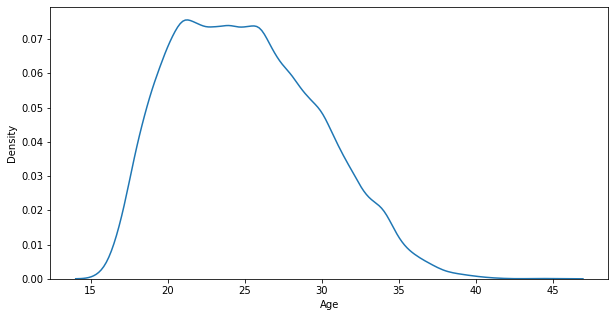

In [18]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Age)
plt.show()

Esta es una nueva celda que agregué recienm